# Transfer learning and fine tuning for image classification

## Transfer learning

### Importing the libraries

In [1]:
!pip install tensorflow-gpu==2.9.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
import seaborn as sns
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import os

### Loading the images

In [3]:
path = 'cat_dog_2.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

### Train and test set

In [4]:
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)
train_dataset = training_generator.flow_from_directory('cat_dog_2/training_set',
                                                       target_size=(256, 256),
                                                       batch_size=8,
                                                       class_mode='binary',
                                                       shuffle=True)

Found 4000 images belonging to 2 classes.


In [5]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory('cat_dog_2/test_set',
                                                       target_size=(256, 256),
                                                       batch_size=1,
                                                       class_mode='binary',
                                                       shuffle=False)

Found 1000 images belonging to 2 classes.


### Pre-trained network

In [6]:
base_model = tf.keras.applications.ResNet50(weights='imagenet', 
                                            include_top=False,
                                            input_tensor=Input(shape=(256, 256, 3)))

In [7]:
for layer in base_model.layers:
  layer.trainable = False

### Custom dense layer

In [8]:
head_model = base_model.output
head_model = GlobalAveragePooling2D()(head_model)
head_model = Dense(units=1025, activation='relu')(head_model) 
head_model = Dropout(rate=0.2)(head_model)
head_model = Dense(units=1025, activation='relu')(head_model)
head_model = Dropout(rate=0.2)(head_model)
head_model = Dense(units=1, activation='sigmoid')(head_model)

### Building and training the neural network

In [9]:
model = Model(inputs=base_model.input, outputs=head_model)

In [10]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(train_dataset, epochs=30)

Epoch 1/30
500/500 [==============================] - 75s 134ms/step - loss: 0.7169 - accuracy: 0.5405
Epoch 2/30
500/500 [==============================] - 66s 132ms/step - loss: 0.6826 - accuracy: 0.5548
Epoch 3/30
500/500 [==============================] - 66s 132ms/step - loss: 0.6800 - accuracy: 0.5620
Epoch 4/30
500/500 [==============================] - 66s 131ms/step - loss: 0.6816 - accuracy: 0.5692
Epoch 5/30
500/500 [==============================] - 65s 130ms/step - loss: 0.6706 - accuracy: 0.5805
Epoch 6/30
500/500 [==============================] - 66s 131ms/step - loss: 0.6717 - accuracy: 0.5847
Epoch 7/30
500/500 [==============================] - 66s 131ms/step - loss: 0.6716 - accuracy: 0.5867
Epoch 8/30
500/500 [==============================] - 66s 131ms/step - loss: 0.6713 - accuracy: 0.5782
Epoch 9/30
500/500 [==============================] - 65s 131ms/step - loss: 0.6661 - accuracy: 0.5968
Epoch 10/30
500/500 [==============================] - 66s 131ms/step - l

### Evaluating the neural network

In [12]:
predictions = model.predict(test_dataset)
predictions = np.argmax(predictions, axis=1)
predictions

1000/1000 [==============================] - 12s 11ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [13]:
accuracy_score(test_dataset.classes, predictions)

0.5

<Axes: >

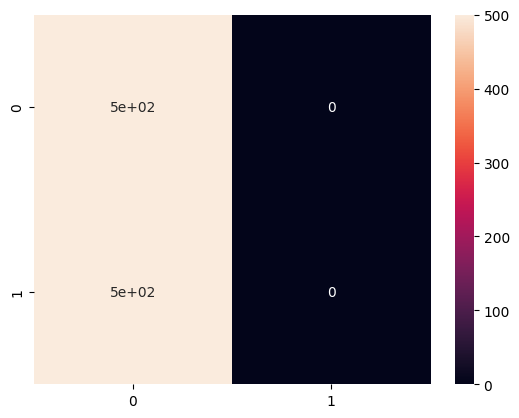

In [14]:
cm = confusion_matrix(test_dataset.classes, predictions)
sns.heatmap(cm, annot=True)

In [15]:
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       500
           1       0.00      0.00      0.00       500

    accuracy                           0.50      1000
   macro avg       0.25      0.50      0.33      1000
weighted avg       0.25      0.50      0.33      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Fine tuning

### Implementing

In [16]:
len(base_model.layers)

175

In [17]:
fine_tuning_at = 140
for layer in base_model.layers[fine_tuning_at:]:
  layer.trainable = True
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(train_dataset, epochs=30)

Epoch 1/30
500/500 [==============================] - 72s 133ms/step - loss: 0.0000e+00 - accuracy: 0.4990
Epoch 2/30
500/500 [==============================] - 67s 133ms/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 3/30
500/500 [==============================] - 67s 134ms/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 4/30
500/500 [==============================] - 67s 134ms/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 5/30
500/500 [==============================] - 67s 134ms/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 6/30
500/500 [==============================] - 67s 134ms/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 7/30
500/500 [==============================] - 67s 134ms/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 8/30
500/500 [==============================] - 67s 133ms/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 9/30
500/500 [==============================] - 67s 134ms/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 10/30
500/500 [================

### Evaluate 

In [19]:
predictions = model.predict(test_dataset)
predictions = np.argmax(predictions, axis=1)
predictions

1000/1000 [==============================] - 12s 11ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [20]:
accuracy_score(test_dataset.classes, predictions)

0.5

<Axes: >

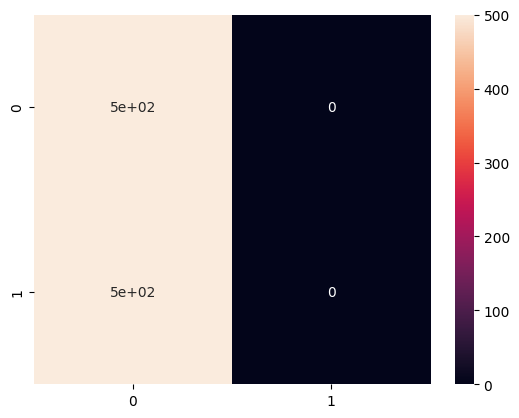

In [21]:
cm = confusion_matrix(test_dataset.classes, predictions)
sns.heatmap(cm, annot=True)

In [22]:
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       500
           1       0.00      0.00      0.00       500

    accuracy                           0.50      1000
   macro avg       0.25      0.50      0.33      1000
weighted avg       0.25      0.50      0.33      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
